#### Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Extracting the dataset: 

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### EDA:

In [5]:
# Checking the shape of the dataset: 
df.shape

(400, 5)

In [6]:
# Chekcing if we have any nan values: 
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# Converting categorical data into dummy variables: 
df = pd.get_dummies(df)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [8]:
# Escaping the dummy variable trap: 
df = df.drop(columns=['Gender_Female'])
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [9]:
# Getting rid of the User ID, as its not important for our analysis: 
df = df.drop(columns=['User ID'])
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


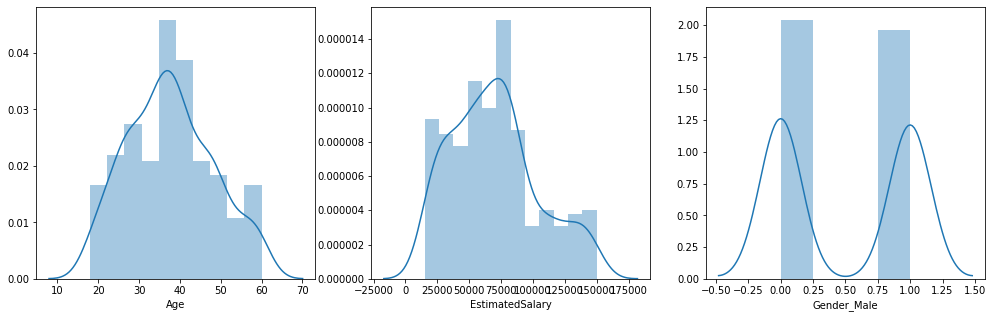

In [19]:
# Plotting the Graphs:
f, axes = plt.subplots(1,3, figsize = (17,5))
sns.distplot(df['Age'], ax = axes[0])
sns.distplot(df['EstimatedSalary'], ax = axes[1])
sns.distplot(df['Gender_Male'], ax = axes[2])
plt.show()

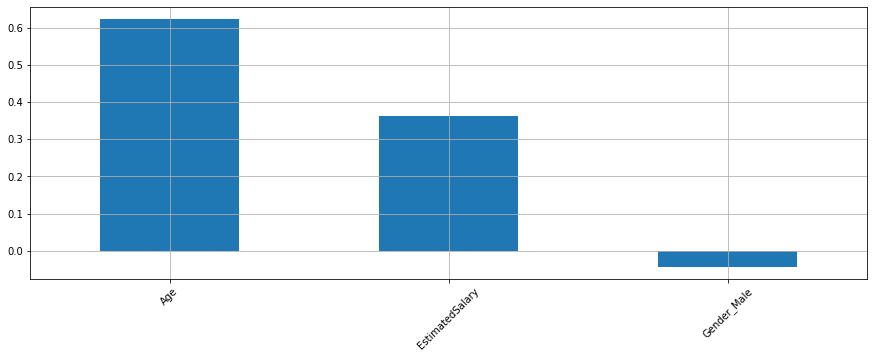

In [28]:
# Plotting the correlation matrix: 
df_temp = df.copy()
df_temp = df.drop(columns=['Purchased'])
plt.figure(figsize=(15, 5))
df_temp.corrwith(df['Purchased']).plot.bar(grid = True, rot = 45)
plt.show()

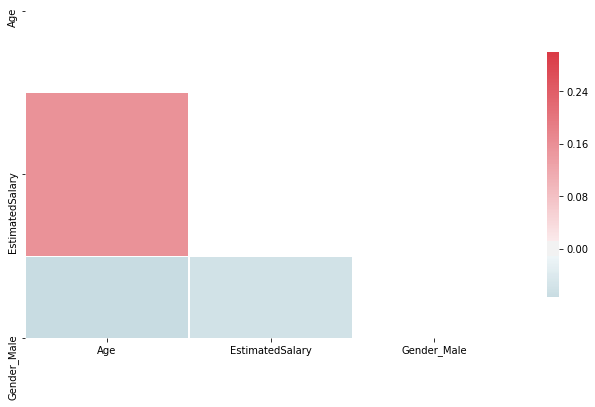

In [30]:
# Plotting the correlations matrix: 
# Compute the correlation matrix
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [36]:
# Defining x and y: 
x = df_temp.copy()
y = df['Purchased'].values

In [37]:
x.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

#### Preparing data

In [39]:
# Splitting the dataset into test and train: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [40]:
# Preprocessing the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
# Chekcing the traina and test splits: 
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (320, 3)
y_train: (320,)
x_test: (80, 3)
y_test: (80,)


#### Building the Model

### Logistic regression

In [47]:
# Building the classifier:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='lbfgs')
lr_classifier.fit(x_train, y_train)

# Making the predictions: 
y_pred_lr = lr_classifier.predict(x_test)

In [64]:
# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_lr.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_lr.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_lr), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_lr), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 71
Incorrect Prediction: 9
Accuracy: 88.75%
Predicion: 91.3%


### KNN 

In [65]:
# Building the model: 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_knn = knn_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_knn.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_knn.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_knn), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_knn), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 74
Incorrect Prediction: 6
Accuracy: 92.5%
Predicion: 86.67%


### Support Vector Machine: 

In [67]:
# Building the model: 
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_svc = svc_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_svc.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_svc.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_svc), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_svc), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 69
Incorrect Prediction: 11
Accuracy: 86.25%
Predicion: 90.48%


### Kernal Suppot Machine: 

In [68]:
# Building the model: 
from sklearn.svm import SVC
ksvc_classifier = SVC(kernel='rbf')
ksvc_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_ksvc = ksvc_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_ksvc = confusion_matrix(y_test, y_pred_ksvc)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_ksvc.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_ksvc.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_ksvc), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_ksvc), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 74
Incorrect Prediction: 6
Accuracy: 92.5%
Predicion: 86.67%


### Naive Bayes :

In [69]:
# Building the model: 
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_nb = nb_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_nb.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_nb.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_nb), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_nb), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 75
Incorrect Prediction: 5
Accuracy: 93.75%
Predicion: 92.58999999999999%


### Decision Tree Classifier: 

In [70]:
# Building the model: 
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_dt = dt_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_dt.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_dt.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_dt), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_dt), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 66
Incorrect Prediction: 14
Accuracy: 82.5%
Predicion: 76.92%


### Random Forest Classifier: 

In [71]:
# Building the model: 
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=500)
rf_classifier.fit(x_train, y_train)

# Making the prediction: 
y_pred_rf = rf_classifier.predict(x_test)

# Plotting the confusion matrix: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_lr)
print('Correct Prediction:', np.sum(cm_rf.diagonal()))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(cm_rf.diagonal()))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_rf), 4)*100) + '%')
print('Predicion:', str(round(precision_score(y_test, y_pred_rf), 4)*100) + '%')

[[50  2]
 [ 7 21]]
Correct Prediction: 73
Incorrect Prediction: 7
Accuracy: 91.25%
Predicion: 86.21%


## Conclusions: 

In [72]:
# Though all the models performed well, the winner of this contest is : Naive Bayes with an accuracy of : 93.75%